In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
link ='https://raw.githubusercontent.com/CookieTaberu/matdis/refs/heads/main/Energy_consumption.csv'
df = pd.read_csv(link)
df

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Saturday,No,82.306692
996,2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,Off,On,25.748176,Tuesday,Yes,66.577320
997,2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471
998,2022-02-11 14:00:00,25.138365,31.306459,1309.079719,3,On,Off,20.425163,Thursday,Yes,76.950389


In [ ]:
# Ubah nilai kategori menjadi numerik
df['HVACUsage'] = df['HVACUsage'].apply(lambda x: 0 if x == 'Off' else 1)
df['LightingUsage'] = df['LightingUsage'].apply(lambda x: 0 if x == 'Off' else 1)
df['Holiday'] = df['Holiday'].apply(lambda x: 0 if x == 'No' else 1)
df['DayOfWeek'] = df['DayOfWeek'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)


In [ ]:
df = df.drop(columns=['Timestamp'])
df = df.drop(columns=['RenewableEnergy'])
df

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,DayOfWeek,Holiday,EnergyConsumption
0,25.139433,43.431581,1565.693999,5,1,0,0,0,75.364373
1,27.731651,54.225919,1411.064918,1,1,1,1,0,83.401855
2,28.704277,58.907658,1755.715009,2,0,0,1,0,78.270888
3,20.080469,50.371637,1452.316318,1,0,1,0,0,56.519850
4,23.097359,51.401421,1094.130359,9,1,0,0,0,70.811732
...,...,...,...,...,...,...,...,...,...
995,28.619382,48.850160,1080.087000,5,0,0,1,0,82.306692
996,23.836647,47.256435,1705.235156,4,0,1,0,1,66.577320
997,23.005340,48.720501,1320.285281,6,0,1,0,1,72.753471
998,25.138365,31.306459,1309.079719,3,1,0,0,1,76.950389


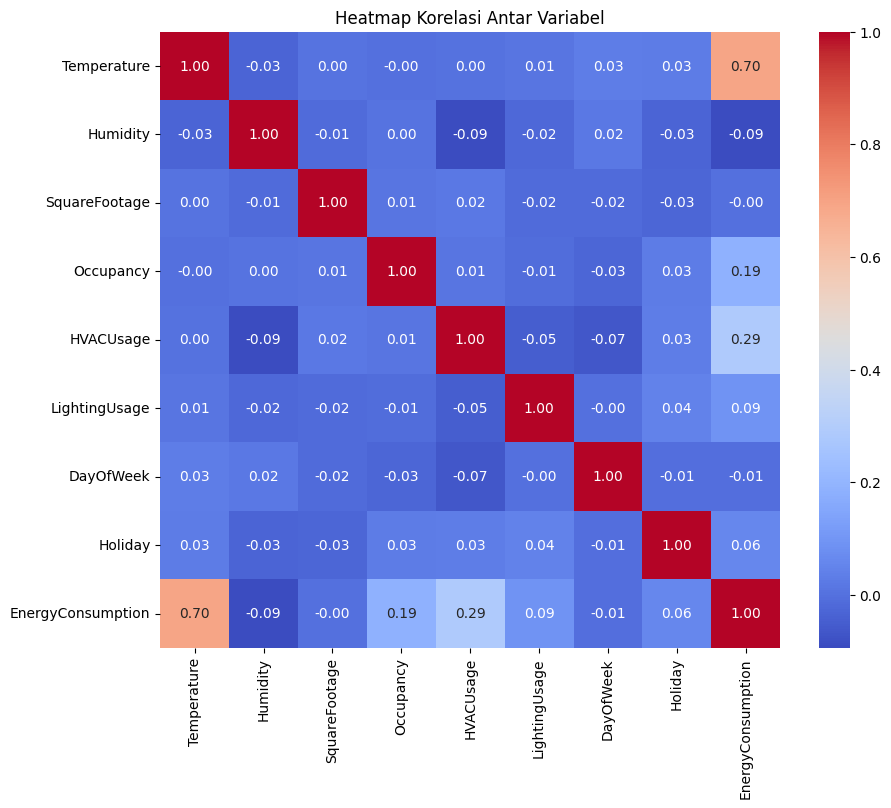

In [ ]:
correlation_matrix = df.corr()

# Buat heatmap menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

In [ ]:
#df = df.drop(columns=['Humidity', 'SquareFootage', 'LightingUsage', 'DayOfWeek', 'Holiday'])

In [ ]:
X = df.drop('EnergyConsumption', axis=1)
y = df['EnergyConsumption']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Create a random forest regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

MSE: 28.00
R-squared: 0.54


In [ ]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print('Feature Importance:')
print(feature_importances.sort_values(ascending=False))

Feature Importance:
Temperature      0.595370
Humidity         0.101705
SquareFootage    0.092947
Occupancy        0.088568
HVACUsage        0.078017
LightingUsage    0.016844
Holiday          0.013416
DayOfWeek        0.013134
dtype: float64


In [ ]:
# import pickle
# from google.colab import files

# # Save the model to a .pkl file
# with open('random_forest_model.pkl', 'wb') as file:
#     pickle.dump(rf_model, file)

# files.download('random_forest_model.pkl')


In [ ]:
import joblib
joblib.dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [ ]:
from google.colab import files

# Save the model to a .pkl file

files.download('random_forest_model.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>